# Чтение и сохранение графов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_data.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.graphml.write_graphml.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

## Вопросы для совместного обсуждения

1\. Обсудите работу с популярными форматами для хранения графов.

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])
nx.draw(G)

In [ ]:
A = nx.adjacency_matrix(G).toarray()

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
nx.write_edgelist(G, "g.edgelist")

In [ ]:
G = nx.read_edgelist(
    "g.edgelist",
    comments="%",
    nodetype=int,
    create_using=nx.DiGraph
)
G.nodes
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
# G.to_directed()

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите матрицу смежности графа из файла `weighted_wheel.npy` и создайте на ее основе граф.  Выведите на экран количество узлов и связей графа. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Выведите на экран словарь со значениями атрибута `weight` на ребрах.

- [ ] Проверено на семинаре

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
matrix = np.load("/content/drive/MyDrive/weighted_wheel.npy")

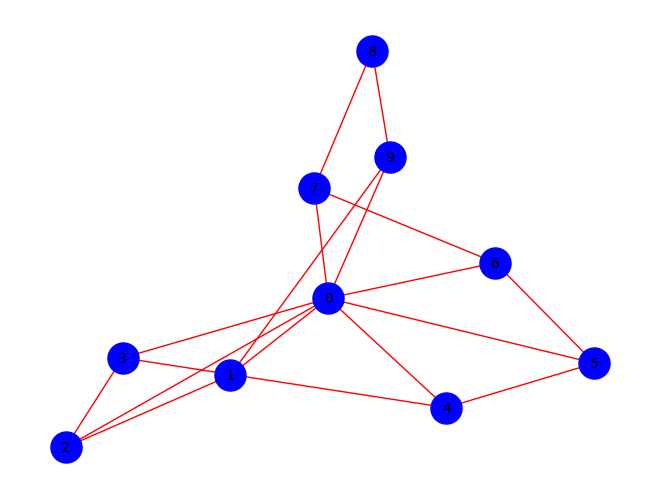

In [27]:
graph = nx.from_numpy_array(matrix)
nx.draw(graph, with_labels=True, node_size=500, font_size=10, node_color='blue', edge_color='red')
plt.show()

In [28]:
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
print(f"Кол-во узлов: {num_nodes}")
print(f"Кол-во связей: {num_edges}")

Кол-во узлов: 10
Кол-во связей: 17


In [29]:
print(f"Тип графа: nx.{type(graph).__name__}")

Тип графа: nx.Graph


In [30]:
edge_weights = nx.get_edge_attributes(graph, 'weight')
for edge, weight in edge_weights.items():
    print(f"Ребро {edge}: {weight}")

Ребро (0, 1): 2.0
Ребро (0, 3): 3.0
Ребро (0, 4): 3.0
Ребро (0, 5): 1.0
Ребро (0, 6): 4.0
Ребро (0, 7): 4.0
Ребро (0, 2): 1.0
Ребро (0, 9): 3.0
Ребро (1, 2): 2.0
Ребро (1, 9): 1.0
Ребро (2, 3): 2.0
Ребро (3, 4): 1.0
Ребро (4, 5): 4.0
Ребро (5, 6): 3.0
Ребро (6, 7): 3.0
Ребро (7, 8): 2.0
Ребро (8, 9): 4.0


In [31]:
edge_weights

{(0, 1): 2.0,
 (0, 3): 3.0,
 (0, 4): 3.0,
 (0, 5): 1.0,
 (0, 6): 4.0,
 (0, 7): 4.0,
 (0, 2): 1.0,
 (0, 9): 3.0,
 (1, 2): 2.0,
 (1, 9): 1.0,
 (2, 3): 2.0,
 (3, 4): 1.0,
 (4, 5): 4.0,
 (5, 6): 3.0,
 (6, 7): 3.0,
 (7, 8): 2.0,
 (8, 9): 4.0}

<p class="task" id="2"></p>

2\. Загрузите матрицу смежности графа из файла `weighted_oriented_wheel.npy` и создайте на ее основе ориентированный граф.  Визуализируйте граф. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Получите матрицу смежности загруженного графа и покажите, что она не является симметричной.

- [ ] Проверено на семинаре

In [32]:
matrix1 = np.load("/content/drive/MyDrive/weighted_oriented_wheel.npy")

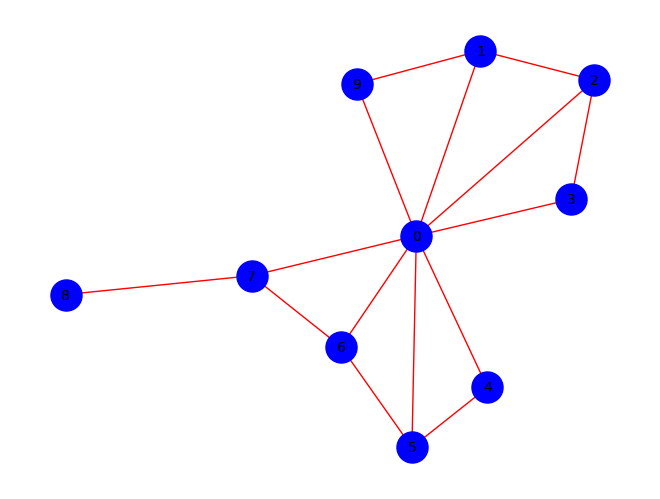

In [33]:
G = nx.from_numpy_array(matrix1)
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color='blue', edge_color='red')
plt.show()

In [34]:
print(f'nx.{type(G).__name__}')

nx.Graph


In [35]:
adj_matrix = nx.to_numpy_array(G)
is_symmetric = np.allclose(adj_matrix, adj_matrix.T)
if is_symmetric:
    print("Матрица смежности симметрична")
else:
  print("Матрица смежности не симметрична")

Матрица смежности симметрична


<p class="task" id="3"></p>

3\. Загрузите информацию о ребрах графа из файла `data/karate.edgelist` и создайте на ее основе граф. При создании графа приведите идентификаторы узлов к числовому типу. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Загрузите граф карате-клуба при помощи функции `nx.karate_club_graph`. Сравните две матрицы смежности (загруженного из файла графа и графа, созданного функцией) и покажите, что они одинаковые. При создании матриц смежности учтите, что порядок следования узлов в графах может различаться.  

- [ ] Проверено на семинаре

In [36]:
import networkx as nx

In [37]:
G = nx.read_edgelist('/content/drive/MyDrive/karate.edgelist')

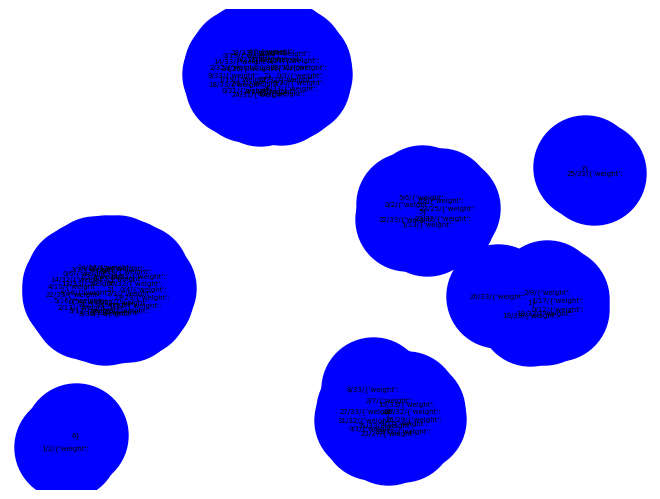

In [38]:
nx.draw(G, with_labels=True, node_size=5500, font_size=5, node_color='blue')
plt.show()

In [39]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Количество узлов:", num_nodes)
print("Количество ребер:", num_edges)

Количество узлов: 85
Количество ребер: 78


In [40]:
print("Список узлов графа:", list(G.nodes))

Список узлов графа: ["0/1/{'weight':", '4}', "0/2/{'weight':", '5}', "0/3/{'weight':", '3}', "0/4/{'weight':", "0/5/{'weight':", "0/6/{'weight':", "0/7/{'weight':", '2}', "0/8/{'weight':", "0/10/{'weight':", "0/11/{'weight':", "0/12/{'weight':", '1}', "0/13/{'weight':", "0/17/{'weight':", "0/19/{'weight':", "0/21/{'weight':", "0/31/{'weight':", "1/2/{'weight':", '6}', "1/3/{'weight':", "1/7/{'weight':", "1/13/{'weight':", "1/17/{'weight':", "1/19/{'weight':", "1/21/{'weight':", "1/30/{'weight':", "2/3/{'weight':", "2/7/{'weight':", "2/8/{'weight':", "2/9/{'weight':", "2/13/{'weight':", "2/27/{'weight':", "2/28/{'weight':", "2/32/{'weight':", "3/7/{'weight':", "3/12/{'weight':", "3/13/{'weight':", "4/6/{'weight':", "4/10/{'weight':", "5/6/{'weight':", "5/10/{'weight':", "5/16/{'weight':", "6/16/{'weight':", "8/30/{'weight':", "8/32/{'weight':", "8/33/{'weight':", "9/33/{'weight':", "13/33/{'weight':", "14/32/{'weight':", "14/33/{'weight':", "15/32/{'weight':", "15/33/{'weight':", "18/32

In [41]:
G_karate = nx.karate_club_graph()
adj_matrix_load = nx.to_numpy_array(G)
adj_matrix_karate = nx.to_numpy_array(G_karate)
are_equal = np.array_equal(adj_matrix_load, adj_matrix_karate)
if are_equal:
    print("Матрицы смежности одинаковые")
else:
    print("Матрицы смежности неодинаковые")

Матрицы смежности неодинаковые


<p class="task" id="4"></p>

4\. Загрузите граф Wikibooks edits (qu) с сайта http://konect.cc/. При чтении назовите атрибуты на ребрах `x` и `y` и преобразуйте их в числа. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Выведите на экран информацию о ребрах и их атрибутах. Преобразуйте граф в словарь при помощи функции `node_link_data`, удалите информацию об атрибутах `x` и `y` из полученного представления и сохраните его в JSON файл.

- [ ] Проверено на семинаре

<p class="task" id="5"></p>

5\. Загрузите граф из файла `data/people.xml`. Идентификатором узла выступает значение атрибута `id`. Значения тегов `age` и `salary` храните в виде атрибутов узлов. Для связей значение тега `type` храните в виде отдельного атрибута ребра. Визуализируйте граф. Сохраните созданный граф в формате graphml.

- [ ] Проверено на семинаре

In [81]:
!pip install pygraphml

  Preparing metadata (setup.py) ... done
  Created wheel for pygraphml: filename=pygraphml-2.4.2-py2.py3-none-any.whl size=9753 sha256=29cce22854267be47965b9a01b59e4b6c8185f97a789e06064dd411a4595f9bf
  Stored in directory: /root/.cache/pip/wheels/53/54/89/5e593a97dfd4c2ef866dc9cee0c31b1639ece2a4abf55f6eda
Successfully built pygraphml


In [85]:
import networkx as nx
import xml.etree.ElementTree as ET

tree = ET.parse('/content/drive/MyDrive/people.xml')
root = tree.getroot()

In [86]:
G = nx.Graph()

In [87]:
for node in root.findall('node'):
    node_id = node.get('id')
    age = int(node.find('age').text)
    salary_element = node.find('salary')
    salary = int(salary_element.text) if salary_element is not None else None
    G.add_node(node_id, age=age, salary=salary)

In [88]:
for edge in root.findall('edge'):
    source = edge.get('source')
    target = edge.get('target')
    edge_type = edge.get('type')
    G.add_edge(source, target, type=edge_type)

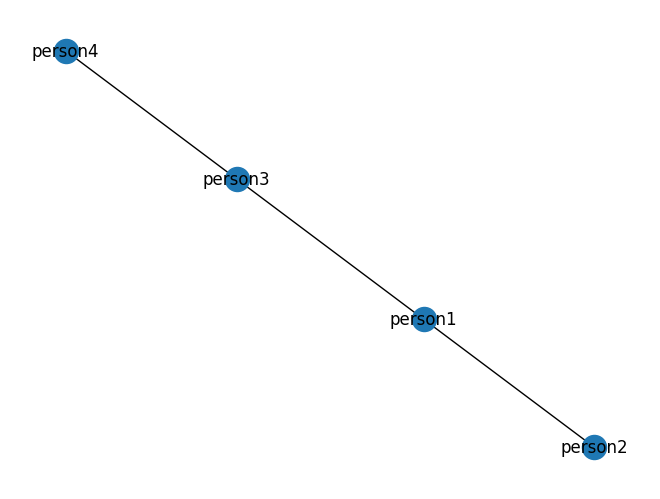

In [89]:
nx.draw(G, with_labels=True)
plt.show()